<a href="https://colab.research.google.com/github/NallelyPintor/ImageDataGenerator-flow-method-in-CNN-for-vehicles/blob/main/ImageDataGenerator_with_flow()_method_in_CNN_for_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip vehicle.zip

Archive:  vehicle.zip
   creating: vehicle/emergency/
  inflating: vehicle/emergency/10.jpg  
  inflating: vehicle/emergency/101.jpg  
  inflating: vehicle/emergency/103.jpg  
  inflating: vehicle/emergency/104.jpg  
  inflating: vehicle/emergency/106.jpg  
  inflating: vehicle/emergency/107.jpg  
  inflating: vehicle/emergency/108.jpg  
  inflating: vehicle/emergency/11.jpg  
  inflating: vehicle/emergency/110.jpg  
  inflating: vehicle/emergency/112.jpg  
  inflating: vehicle/emergency/113.jpg  
  inflating: vehicle/emergency/114.jpg  
  inflating: vehicle/emergency/116.jpg  
  inflating: vehicle/emergency/117.jpg  
  inflating: vehicle/emergency/119.jpg  
  inflating: vehicle/emergency/12.jpg  
  inflating: vehicle/emergency/122.jpg  
  inflating: vehicle/emergency/123.jpg  
  inflating: vehicle/emergency/125.jpg  
  inflating: vehicle/emergency/126.jpg  
  inflating: vehicle/emergency/127.jpg  
  inflating: vehicle/emergency/129.jpg  
  inflating: vehicle/emergency/130.jpg  
  infl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import  label_binarize, LabelBinarizer
from keras.preprocessing import  image
from keras.preprocessing.image import img_to_array, array_to_img
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Flatten, Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
#from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

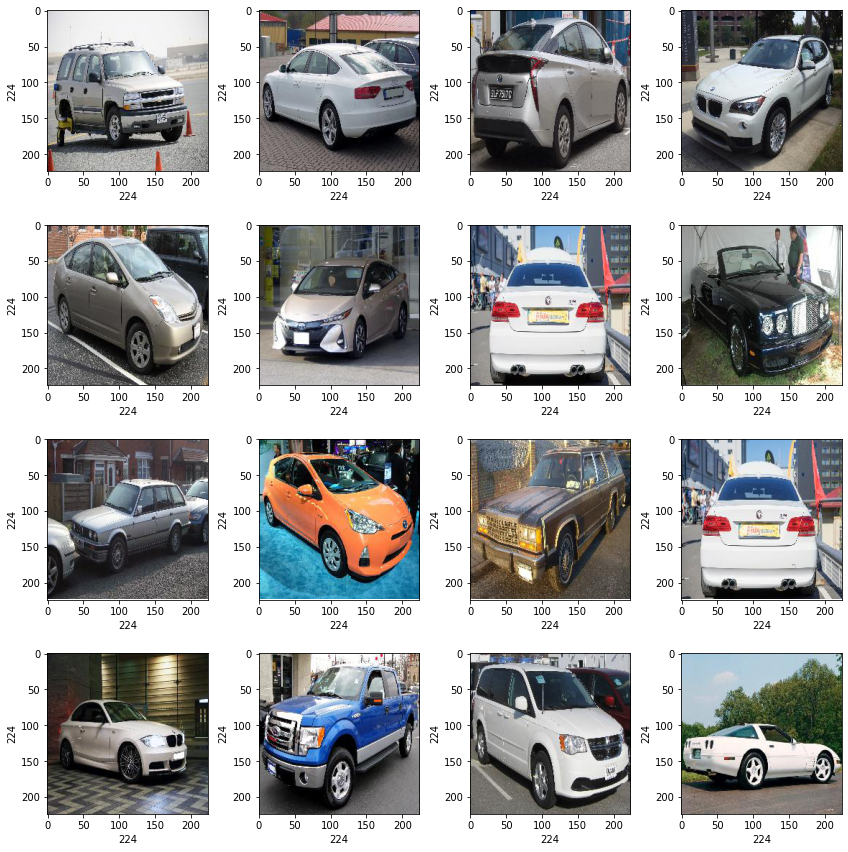

In [3]:
#Visualización del tamaño de las imagenes para saber si se tiene que redimensionar la imagen o no
plt.figure(figsize=(12,12))

#path = '/content/vehicle/emergency'   
path = '/content/vehicle/noemergency'
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))

    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) #width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) #height of image

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image,(256,256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
dir = "/content/vehicle"
root_dir = listdir(dir)
image_list,label_list =[],[]
all_labels = ['emergency', 'noemergency']
binary_labels = [0,1]
temp = -1

for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}") 
    temp += 1
    for files in plant_image_list:
        image_path = f'{dir}/{directory}/{files}'
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [6]:
# Numero de clases
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    200
1    200
dtype: int64

In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(400,)

In [9]:
# Separacion de los datos entre set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list , test_size = 0.2, random_state = 10)

In [10]:
x_train = np.array(x_train, dtype = np.float16) /255.0
x_test = np.array(x_test, dtype = np.float16) /255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [11]:
# Usemos Keras para encodificar los valores con "one-hot enconding" 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
# Create the architecture for our CNN model
model = Sequential()

model.add(Conv2D(32,(3,3), padding = "same",input_shape = (256,256,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)      

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.2)

In [47]:
epochs = 35
batch_size = 16  
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_val, y_val) )

Epoch 1/35
11/11 [==============================] - 18s 2s/step - loss: 0.6867 - accuracy: 0.6319 - val_loss: 0.6891 - val_accuracy: 0.5854
Epoch 2/35
11/11 [==============================] - 14s 1s/step - loss: 0.6867 - accuracy: 0.6319 - val_loss: 0.6890 - val_accuracy: 0.5854
Epoch 3/35
11/11 [==============================] - 14s 1s/step - loss: 0.6863 - accuracy: 0.6442 - val_loss: 0.6888 - val_accuracy: 0.5854
Epoch 4/35
11/11 [==============================] - 14s 1s/step - loss: 0.6859 - accuracy: 0.6564 - val_loss: 0.6887 - val_accuracy: 0.6341
Epoch 5/35
11/11 [==============================] - 14s 1s/step - loss: 0.6854 - accuracy: 0.6687 - val_loss: 0.6885 - val_accuracy: 0.6585
Epoch 6/35
11/11 [==============================] - 19s 2s/step - loss: 0.6849 - accuracy: 0.6871 - val_loss: 0.6883 - val_accuracy: 0.6585
Epoch 7/35
11/11 [==============================] - 15s 1s/step - loss: 0.6844 - accuracy: 0.7055 - val_loss: 0.6881 - val_accuracy: 0.6829
Epoch 8/35
11/11 [==


Model training without augmenting data


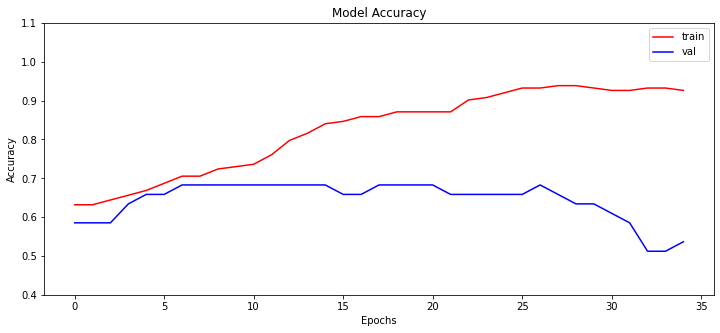

In [48]:
plt.figure(figsize =(12,5))
plt.plot(history.history ['accuracy'],color = 'r' )  
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title ('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.ylim(0.4,1.1)
plt.show()

**Image Augmentation**

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:

# Augmentation
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   height_shift_range=0.2,
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   shear_range=0.15,
                                   brightness_range=[0.2,0.8] # brightness
                                   )  


On-the-fly data augmentation with flow() method

In [51]:
epochs = 35 
batch_size = 16 
#steps_per_epoch=x_train.shape[0] // batch_size

history2 = model.fit(train_datagen.flow(x_train, y_train, batch_size = batch_size), epochs=epochs, steps_per_epoch=len(x_train) // batch_size,validation_data = (x_val, y_val) )

Epoch 1/35
10/10 [==============================] - 15s 1s/step - loss: 0.8834 - accuracy: 0.6054 - val_loss: 0.6890 - val_accuracy: 0.5854
Epoch 2/35
10/10 [==============================] - 15s 1s/step - loss: 0.6781 - accuracy: 0.5646 - val_loss: 0.6920 - val_accuracy: 0.5122
Epoch 3/35
10/10 [==============================] - 15s 2s/step - loss: 0.6769 - accuracy: 0.5238 - val_loss: 0.6918 - val_accuracy: 0.5122
Epoch 4/35
10/10 [==============================] - 15s 1s/step - loss: 0.6708 - accuracy: 0.5374 - val_loss: 0.6916 - val_accuracy: 0.5366
Epoch 5/35
10/10 [==============================] - 15s 1s/step - loss: 0.6731 - accuracy: 0.5646 - val_loss: 0.6908 - val_accuracy: 0.5366
Epoch 6/35
10/10 [==============================] - 16s 2s/step - loss: 0.6594 - accuracy: 0.5750 - val_loss: 0.6889 - val_accuracy: 0.5854
Epoch 7/35
10/10 [==============================] - 15s 1s/step - loss: 0.6153 - accuracy: 0.6463 - val_loss: 0.6867 - val_accuracy: 0.6829
Epoch 8/35
10/10 [==

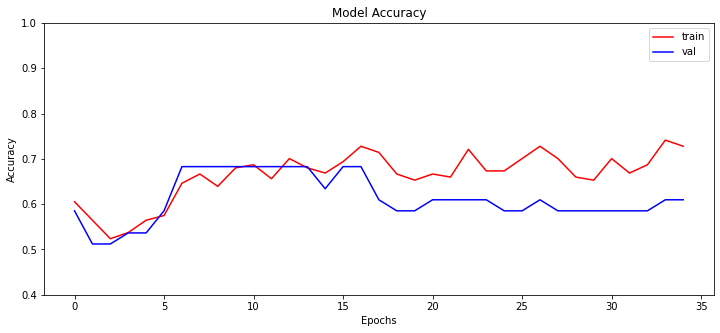

In [52]:
plt.figure(figsize =(12,5))
plt.plot(history2.history ['accuracy'],color = 'r' )  
plt.plot(history2.history['val_accuracy'], color = 'b')
plt.title ('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.ylim(0.4,1)
plt.show()

In [53]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {scores[1]*100}')

[INFO] Calculating model accuracy
3/3 [==============================] - 2s 492ms/step - loss: 0.6846 - accuracy: 0.6125
Test Accuracy: 61.250001192092896


By using data augmentation we were able to combat overfitting